In [1]:
import re
import nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
from wordcloud import WordCloud

한글 텍스트 전처리

In [2]:
with open('설선물.txt', encoding='utf-8') as file: #한글이 깨지지 않게
    text=file.read()

In [3]:
text #원데이터 그대로 저장

'이번 설에 남자친구 부모님께 설 선물 해드리고 싶어요\n지금 400일 정도 됐는데 아직 얼굴 뵙고 인사드린적은\n한번도 없어요 근데 남자친구한테 부모님 가져다드리라고\n설 선물 정과? 같은거 주면 부담스러워하실까용,,,\n남자친구가 갑자기 이번설에 인사드리러 가자고 해서\n너무 갑작스러워서 거절했는데 맘에 걸려서요\n---------------------------------------------------------\n안녕하세요~ 연애 부럽네요 ㅋㅋ\n많이 고민되시겟어요...\n이성친구의 부모님은 항상 고민을 하게 만들고\n생각이 많아지게 하지요.....\n정과정도면 과하지 않아서 괜찮을것같아요~\n그리고 400일 정도면 남자친구분께서 부모님께 질문자님에 대해\n충분히 얘기를 많이 햇을것같은데.....\n인사드리는 것도 좋은 방법일것같아요.....\n아들의 여자친구를 반기지 않는 부모는 드라마에서나 빈번한 일이지\n우리내 삶에서는 다들 반겨주시고 좋아해주시더라구요^^\n좋은 결정내리시고 찾아뵙지않더라도 선물을 드리려는 이쁜마음을 응원합니다~\n\n안녕하세요, 할머니께 설 선물을 준비하고 계시는군요\n정말 효심이 깊네요,\n관련 상품을 찾아보았습니다. 즐거운 설명절 되시기를 바랍니다.\nhttps://link.coupang.com/a/L3zYo\nhttps://link.coupang.com/a/L3z3x\nhttps://link.coupang.com/a/L3Abq\n"이 포스팅은 쿠팡 파트너스 활동의 일환으로, 이에 따른 일정액의 수수료를 제공받습니다."\n\n안녕하세요 ’_‘\n보자기 포장으로 되어있어\n보기에도 고급진 포장에 건강까지\n설 선물로 제격인 거 같아요\n꼭 좋은 선물이 되길 바래요\n\n사과즙 추천드립니다\n제가 자주 먹는 사과즙이 있는데\n가격대 한박스당 2만원 선인데 가격도\n적절하고 사과를 통째로 넣어서 그런지\n당도도 좋은거 같아요 아래 정보 드립니다\n\n✔ 주문하기\nhttps://naver.me/xivR2Mm7\n✔1/18까지 주

In [4]:
okt=Okt()
tokens=okt.nouns(text) #명사만 추출 (선물은 보통 명사이기 때문에)
tokens[:10] #10개만 뽑기

['이번', '설', '남자친구', '부모님', '설', '선물', '지금', '정도', '얼굴', '인사']

In [5]:
#영문자, 숫자, 구두점 제거
new_tokens=[]
for token in tokens:
    item=re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token) #정규표현식 사용해 한글만 남기고 지우기. token=데이터
    if item:
        new_tokens.append(item)

불용어 처리

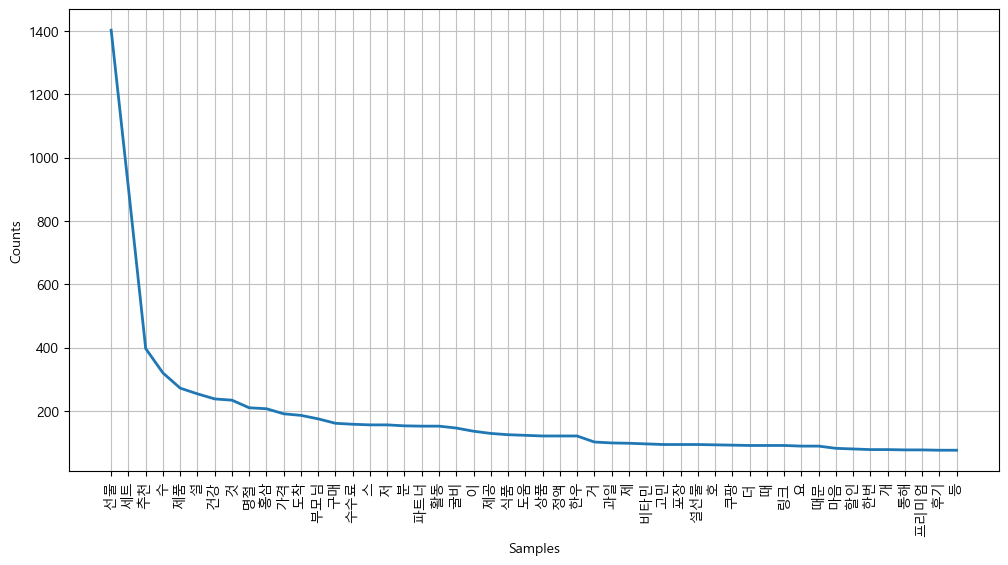

In [6]:
gift = nltk.Text(new_tokens, name='설 선물')
plt.figure(figsize=(12,6))
gift.plot(50)
plt.show()

In [7]:
stoptext = '''
선물 세트 추천 제품 것 건강 설 도착 가격 부모님 저 수수료 분 즈 파트너 활동 이 제공 설날 수 명절 구매 도움 정액 상품 거 제 고민 설선물 포장 때 호 더 쿠팡 요 링크 때문 할인 등 개 후기 프리미엄
한번 참고 사용 부담 일환 답변 냉장 요즘 가장 비 준비 쇼핑 판매 질문 고급 곳 스 통해 혼합 산 가성 중 이번 해 생각 배송 어르신 위 아래 냉동 포 인기 확인 채택 종 주문 미리 저희 사람 구성 기능 직접
저희 걸 자 몸 새해 하나 코로나 정 면역 고려 맛 의미 지금 정말 정도 박스 보고 복 포스팅 아이 글 여기 모두 향 평 이상 종류
''' #불용어 지정. 주관적인 기준

In [8]:
stop_words = stoptext.split() #리스트 생성
new_tokens = [token for token in new_tokens if token not in stop_words] #for문으로 작성해도됨
new_tokens #새롭게 만들어진 new_tokens

['남자친구',
 '얼굴',
 '인사',
 '남자친구',
 '용',
 '남자친구',
 '갑자기',
 '번설',
 '인사',
 '거절',
 '맘',
 '연애',
 '친구',
 '항상',
 '정과정',
 '도면',
 '과',
 '남자친구',
 '대해',
 '얘기',
 '햇',
 '인사',
 '방법',
 '아들',
 '여자친구',
 '반기',
 '부모',
 '드라마',
 '빈번',
 '일이',
 '우리',
 '내',
 '삶',
 '결정',
 '마음',
 '응원',
 '할머니',
 '효심',
 '관련',
 '설명',
 '절',
 '시기',
 '보자기',
 '보기',
 '진',
 '제격',
 '꼭',
 '바',
 '과즙',
 '자주',
 '과즙',
 '선',
 '사과',
 '통째',
 '도도',
 '정보',
 '시',
 '휴전',
 '가능',
 '전화',
 '문자',
 '가능',
 '우리',
 '우투',
 '뿔',
 '최상',
 '마블',
 '넘버',
 '나인',
 '투뿔',
 '등급',
 '시중',
 '최상',
 '등급',
 '번',
 '마블',
 '넘버',
 '나인',
 '치아',
 '고기',
 '남녀',
 '노소',
 '개인',
 '단체',
 '중량',
 '더크',
 '전화',
 '문의',
 '경기',
 '서울',
 '부지역',
 '연휴',
 '일직',
 '도',
 '문의',
 '최고',
 '등급',
 '한우',
 '매년',
 '부분',
 '지난해',
 '양갱',
 '기호',
 '포함',
 '곶감',
 '연세',
 '만큼',
 '치아',
 '음식',
 '배제',
 '게',
 '혹시',
 '다른',
 '게시',
 '고생',
 '영화',
 '티켓',
 '팝콘',
 '구입',
 '당일',
 '데이트',
 '글씨',
 '만년필',
 '핸드폰',
 '케이스',
 '신지',
 '사실',
 '핸드폰',
 '케이스',
 '돈',
 '경우',
 '대부분',
 '케이스',
 '경우',
 '견과류',
 '말씀',
 '주신',
 '견과류',
 '결정',
 '노블',
 '관',
 '플라

워드클라우드 그리기

In [9]:
gift.vocab().most_common(5) #가장 많이 나온 애 5개

[('선물', 1402), ('세트', 904), ('추천', 397), ('수', 320), ('제품', 272)]

(-0.5, 399.5, 199.5, -0.5)

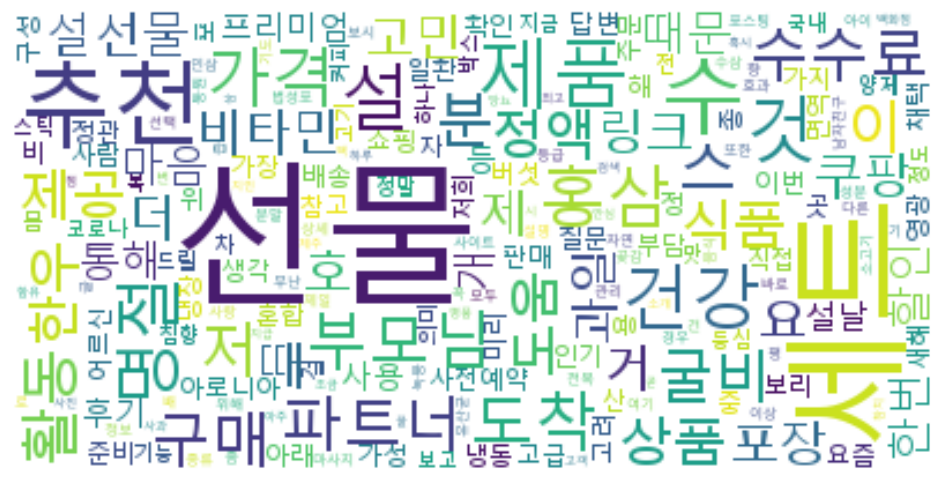

In [10]:
wc=WordCloud(
    background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300))) #딕셔너리 바꿔주기
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') #축 지우기

그림 위에 표시

In [11]:
mask=np.array(Image.open('heart.jpg'))
from wordcloud import ImageColorGenerator #워드클라우드에서 쓸 수 있도록 변형
image_colors=ImageColorGenerator(mask)

(-0.5, 766.5, 719.5, -0.5)

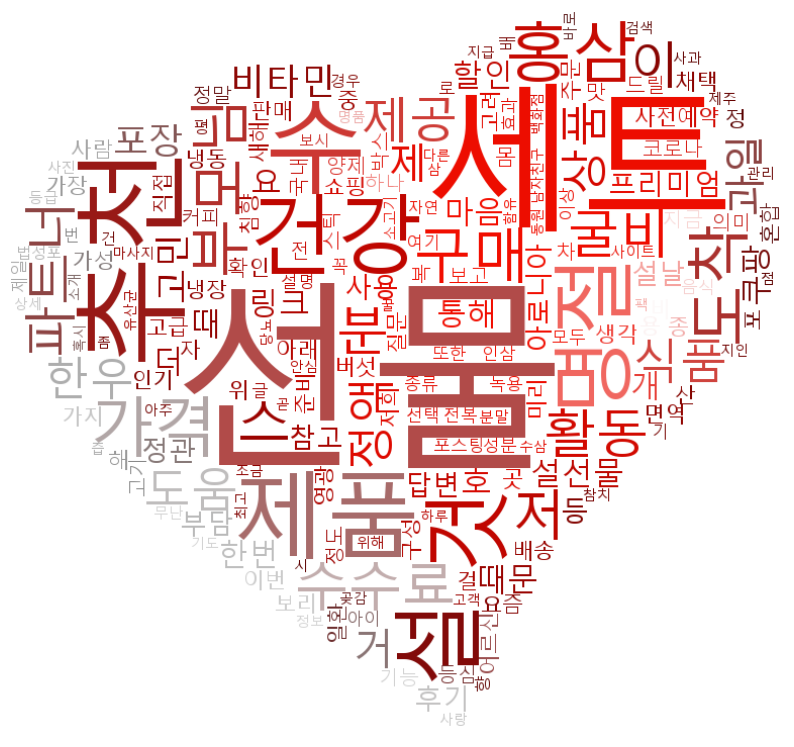

In [13]:
wc = WordCloud(
    background_color='white', random_state = 2023,
    mask=mask, font_path='C:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')